In [10]:
%reload_ext autoreload
%autoreload 2
import slap2_py as spy
import wisco_slap as wis
import wisco_slap.defs as DEFS
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import matplotlib as mpl
import h5py
import glob
import polars as pl
from pathlib import Path
import tifffile
import seaborn as sns
import electro_py as epy
import cv2
from wisco_slap.scope import SynDF

In [8]:
di = wis.util.info.load_dmd_info()
from wisco_slap.scope.syn_topo import save_syn_orders
si = wis.peri.sync.load_sync_info()
for subject in si.keys():
    for exp in si[subject].keys():
        acq_ids = wis.util.info.get_unique_acquisitions_per_experiment(subject, exp)
        for acq_id in acq_ids:
            try:
                print(f"Working on {subject} {exp} {acq_id}")
                loc, acq = acq_id.split("--")
                wis.scope.syn_topo.save_syn_orders(
                    subject, exp, loc, acq
                )
            except Exception as e:
                print(
                    f"Error saving glutamate sums for {subject} {exp} {loc} {acq}: {e}"
                )
                continue

Working on alkaid exp_1 loc_E--acq_1
1
2
Error saving glutamate sums for alkaid exp_1 loc_E acq_1: datatypes of join keys don't match - `soma-ID`: f64 on left does not match `soma-ID`: str on right
Working on alkaid exp_1 loc_E--acq_2
1
/Volumes/slap_mi/slap_mi/analysis_materials/annotation_materials/alkaid/exp_1/loc_E/acq_2/synapse_ids/dmd-1/synapse_labels.csv does not exist!
Error saving glutamate sums for alkaid exp_1 loc_E acq_2: 'NoneType' object has no attribute 'filter'
Working on alkaid exp_2 loc_J--acq_2
1
2
Working on alkaid exp_2 loc_J--acq_1
1
/Volumes/slap_mi/slap_mi/analysis_materials/annotation_materials/alkaid/exp_2/loc_J/acq_1/synapse_ids/dmd-1/synapse_labels.csv does not exist!
Error saving glutamate sums for alkaid exp_2 loc_J acq_1: 'NoneType' object has no attribute 'filter'
Working on alkaid exp_3 loc_J--acq_2
1
2
Working on alkaid exp_3 loc_J--acq_1
1
2
Error saving glutamate sums for alkaid exp_3 loc_J acq_1: datatypes of join keys don't match - `soma-ID`: f64 o

In [9]:
si = wis.peri.sync.load_sync_info()
for subject in si.keys():
    for exp in si[subject].keys():
        acq_ids = wis.util.info.get_unique_acquisitions_per_experiment(subject, exp)
        for acq_id in acq_ids:
            try:
                print(f"Working on {subject} {exp} {acq_id}")
                loc, acq = acq_id.split("--")
                wis.pipes.sleepscore.save_matrix_arrays_for_viewer(
                    subject, exp, loc, acq, 'soma1' #TODO: make the directory soma-specific!
                )
            except Exception as e:
                print(
                    f"Error saving glutamate sums for {subject} {exp} {loc} {acq}: {e}"
                )
                continue

Working on alkaid exp_1 loc_E--acq_2
1
/Volumes/slap_mi/slap_mi/analysis_materials/annotation_materials/alkaid/exp_1/loc_E/acq_2/synapse_ids/dmd-1/synapse_labels.csv does not exist!
Error saving glutamate sums for alkaid exp_1 loc_E acq_2: 'NoneType' object has no attribute 'filter'
Working on alkaid exp_1 loc_E--acq_1
1
2
Error saving glutamate sums for alkaid exp_1 loc_E acq_1: datatypes of join keys don't match - `soma-ID`: f64 on left does not match `soma-ID`: str on right
Working on alkaid exp_2 loc_J--acq_1
1
/Volumes/slap_mi/slap_mi/analysis_materials/annotation_materials/alkaid/exp_2/loc_J/acq_1/synapse_ids/dmd-1/synapse_labels.csv does not exist!
Error saving glutamate sums for alkaid exp_2 loc_J acq_1: 'NoneType' object has no attribute 'filter'
Working on alkaid exp_2 loc_J--acq_2
1
2
Error saving glutamate sums for alkaid exp_2 loc_J acq_2: No such file or directory (os error 2): ...s/alkaid/exp_2/activity_data/loc_J/acq_2/glutamate_event_detection/bayes_hm/dmd1.parquet (se

In [11]:
subject = 'kaus'
exp = 'exp_1'
loc = 'loc_E'
acq = 'acq_1'

In [27]:
idf = wis.scope.io.load_synid_labels(subject, exp, loc, acq)
dend_ids = {}
for dmd in [1, 2]:
    dend_ids[dmd] = np.sort(
        idf.filter(pl.col("dmd") == dmd)["dend-ID"].unique().to_numpy()
    )

1
2


In [13]:
idf = wis.scope.io.load_synid_labels(subject, exp, loc, acq)
dend_ids = np.sort(idf.filter(pl.col('dmd')==2)['dend-ID'].unique().to_numpy())
dmd = 2
dmp = f"{DEFS.anmat_root}/annotation_materials/{subject}/{exp}/{loc}/{acq}/source_sorting/prox_lines_dmd{dmd}.csv"
dlines = pd.read_csv(dmp)

1
2


In [14]:
dend_info = {}
for ix, dend in enumerate(dend_ids):
    dend_info[dend] = {}
    source_ids = idf.filter(pl.col('dend-ID')==dend)['source-ID'].unique().to_numpy()
    denddf = dlines.loc[dlines['index'] == ix]
    x = denddf['axis-1'].values
    y = denddf['axis-0'].values
    dend_info[dend]['verts'] = [(x[i], y[i]) for i in range(len(x))]
    dend_info[dend]['source_ids'] = source_ids

In [ ]:
mean_im = wis.scope.io.load_mean_ims(subject, exp, loc, acq)

In [29]:
syn_ords = wis.scope.syn_topo.load_syn_orders(subject, exp, loc, acq)

In [18]:
full_color_order = [
    '#f70707',
    '#f76307',
    '#f3f707',
    '#5bf707',
    '#07f7e3',
    '#07a3f7',
    '#071bf7',
    '#9707f7',
    '#f707bf',
    # --------------- pastels
    '#ff8d6e',
    '#c3ff91',
    '#91b4ff',
    '#cf91ff',
    '#ff91e2',
    # Deeps ---------------
    '#6e3305',
    '#346e05',
    '#05346e',
    '#6e0536',
]
base_color_order = [
    '#f70707',
    '#f76307',
    '#f3f707',
    '#5bf707',
    '#07f7e3',
    '#07a3f7',
    '#071bf7',
    '#9707f7',
    '#f707bf',
]

In [21]:
base_color = '#f70707'
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

def make_sequential_cmap(base_hex, name='custom_seq', n_colors=256, dark_to_light=True):
    """
    Create a sequential colormap from a base hex color.
    
    Parameters:
    -----------
    base_hex : str
        Base color as hex string (e.g., '#f70707')
    name : str
        Name for the colormap
    n_colors : int
        Number of colors in the colormap
    dark_to_light : bool
        If True, goes from dark to light. If False, goes from light to dark.
    
    Returns:
    --------
    LinearSegmentedColormap
    """
    # Convert hex to RGB (0-1 range)
    rgb = mcolors.to_rgb(base_hex)
    
    # Create dark and light versions
    # Dark: blend toward black
    dark = tuple(c * 0.2 for c in rgb)
    # Light: blend toward white
    light = tuple(1 - (1 - c) * 0.2 for c in rgb)
    
    if dark_to_light:
        colors = [dark, rgb, light]
    else:
        colors = [light, rgb, dark]
    
    return LinearSegmentedColormap.from_list(name, colors, N=n_colors)

In [30]:
dend_ids

{1: array(['A-1', 'A-2', 'A-3', 'B-1', 'C-1', 'D-1', 'E-1', 'F-1'],
       dtype=object),
 2: array(['G-1', 'H-1', 'I-1', 'I-2', 'J-1', 'K-1'], dtype=object)}

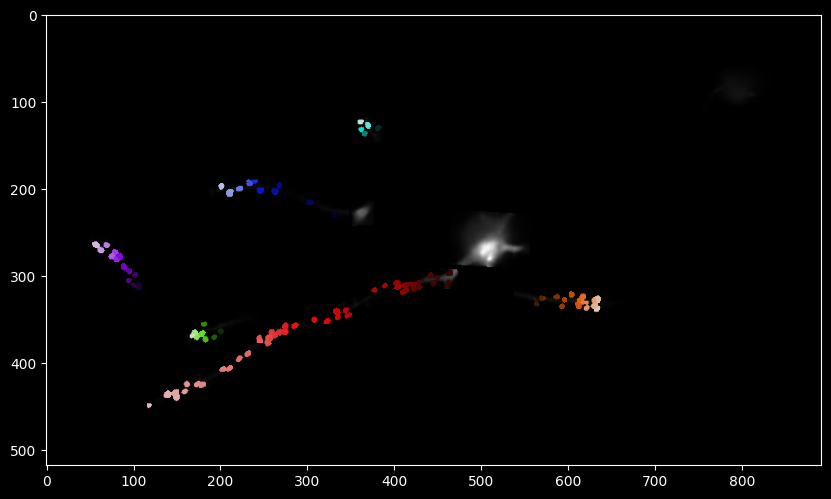

In [113]:
syn_orders = {}
dmd = 2
for dend_id in dend_ids[dmd]:
    syn_orders[dend_id] = syn_ords[dend_id]
colors_fin = []
num_colors_to_get = len(syn_orders)
# Pick colors with maximum spacing
n_available = len(base_color_order)
indices = [int(i * n_available / num_colors_to_get) for i in range(num_colors_to_get)]
color_order_optimal = [base_color_order[i] for i in indices]
synmap = wis.scope.io.load_synapse_map(subject, exp, loc, acq, dmd, exact_values=True)
synmap = synmap[0]
plt.style.use('dark_background')
import numpy as np
dend_cmaps = {}
for i, dend_id in enumerate(syn_orders.keys()):
    cmap = make_sequential_cmap(color_order_optimal[i])
    dend_cmaps[dend_id] = cmap

base_im = mean_im[dmd][1]
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(base_im, cmap='gray')

# Create a single RGBA overlay image
overlay = np.zeros((*synmap.shape, 4), dtype=np.float32)

for dend_id in syn_orders.keys():
    ordered_cmap = dend_cmaps[dend_id]
    n_sources = len(syn_orders[dend_id])

    for i, source_id in enumerate(syn_orders[dend_id]):
        mask = synmap == source_id
        # Get color from ordered_cmap based on position in list (0 to 1)
        color = ordered_cmap(i / (n_sources - 1) if n_sources > 1 else 0)
        colors_fin.append(color)
        # Set the pixels directly in the overlay
        overlay[mask] = color

# Single imshow call for all sources
ax.imshow(overlay, alpha=0.9)

In [93]:
syndf = wis.scope.io.load_syndf(subject, exp, loc, acq, trace_group='dF', trace_types=['matchFilt'], SDF=True)

1
2


In [114]:
dats = []
ssdf = syndf.ts(0, 60)
for dendid in syn_orders:
    for synid in syn_orders[dendid]:
        data = ssdf.ss(dmd, synid)['data'].to_numpy()
        dats.append(data)

In [115]:
datp = np.stack(dats)
datp = datp*-1

(<Figure size 2400x1800 with 1 Axes>, <Axes: >)

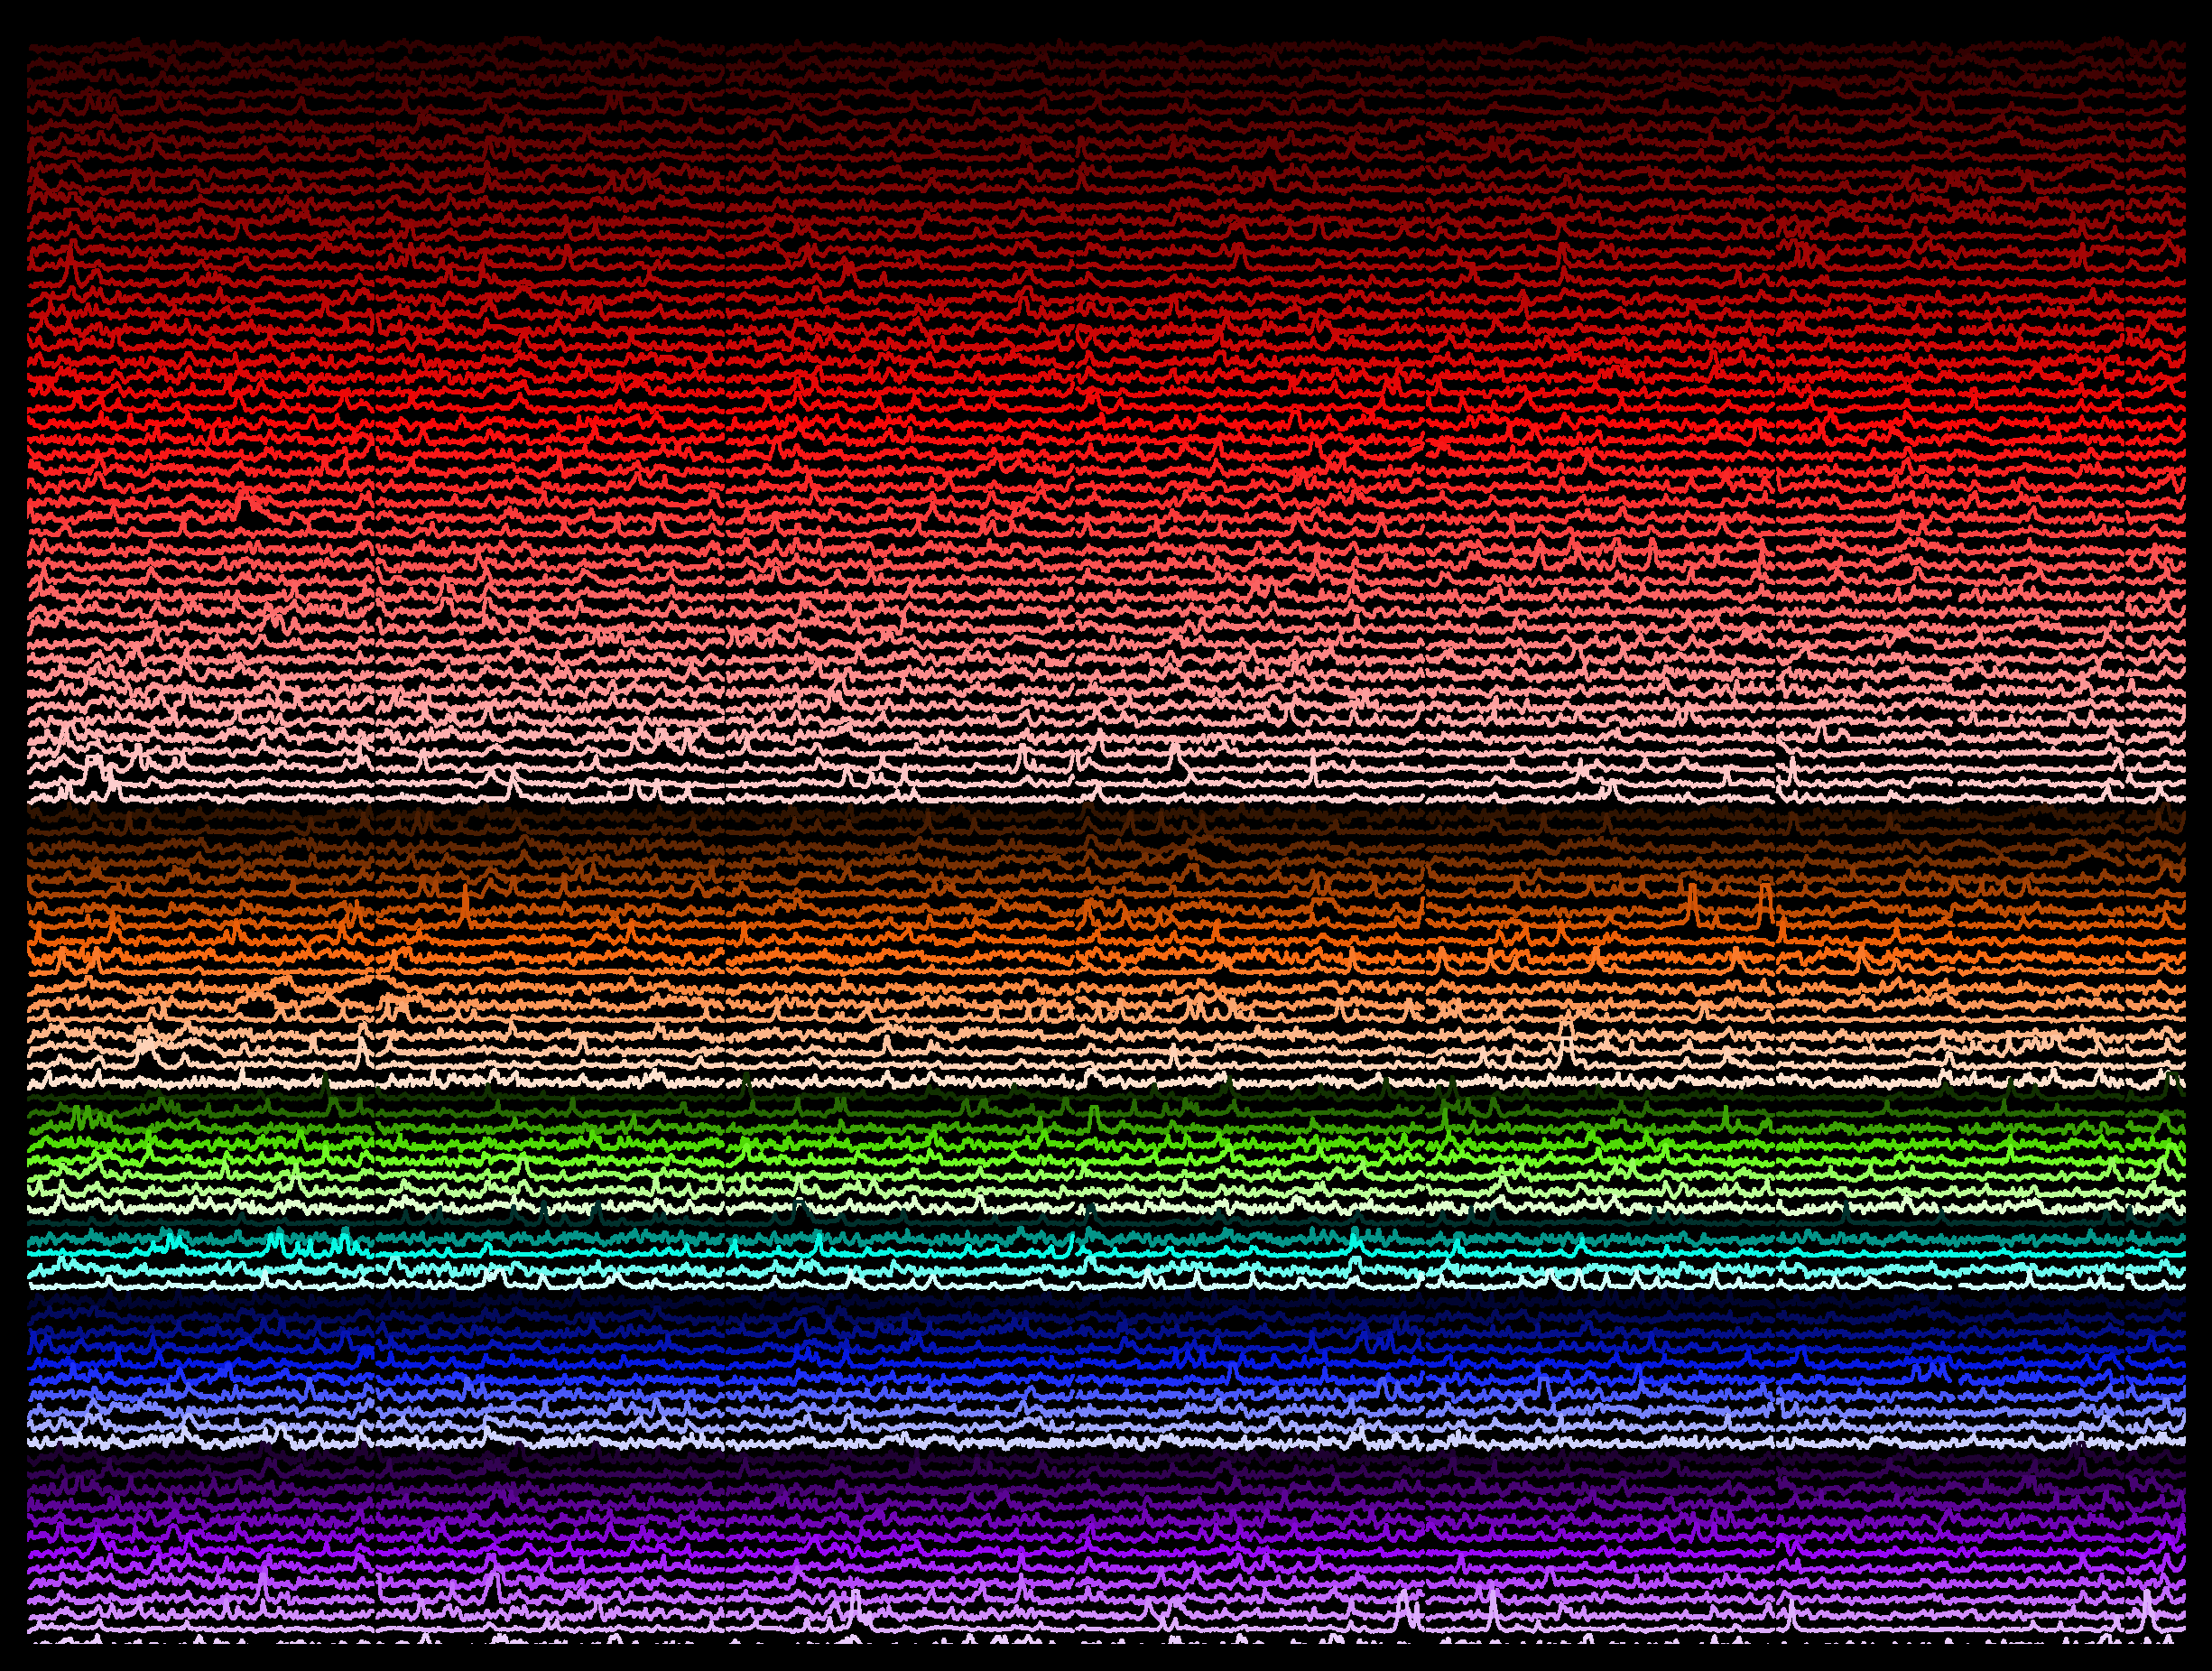

In [116]:
plt.style.use('dark_background')
spy.plot.main.plot_synaptic_traces(datp, fs=200, colors=colors_fin, figsize=(8, 6))

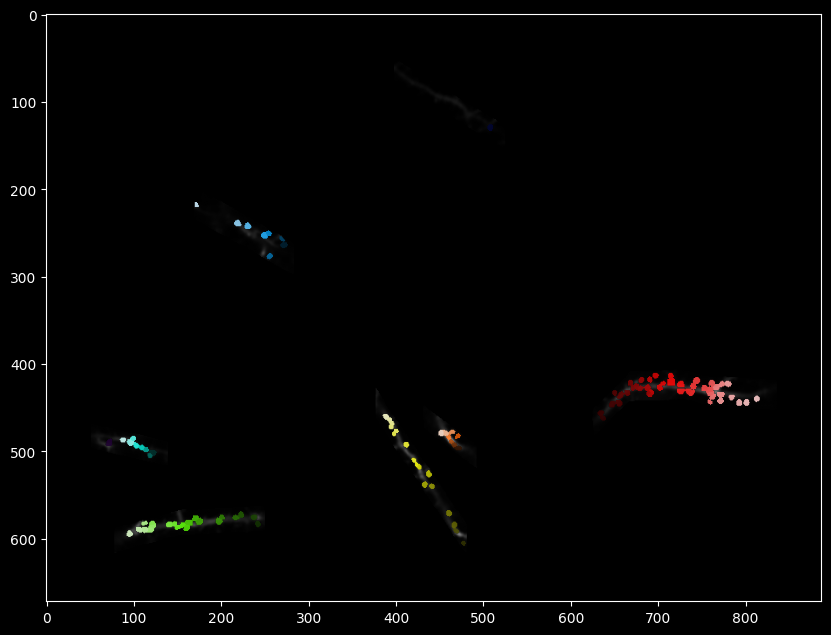

In [109]:
syn_orders = {}
dmd = 1
for dend_id in dend_ids[dmd]:
    syn_orders[dend_id] = syn_ords[dend_id]
colors_fin = []
num_colors_to_get = len(syn_orders)
# Pick colors with maximum spacing
n_available = len(base_color_order)
indices = [int(i * n_available / num_colors_to_get) for i in range(num_colors_to_get)]
color_order_optimal = [base_color_order[i] for i in indices]
synmap = wis.scope.io.load_synapse_map(subject, exp, loc, acq, dmd, exact_values=True)
synmap = synmap[0]
plt.style.use('dark_background')
import numpy as np
dend_cmaps = {}
for i, dend_id in enumerate(syn_orders.keys()):
    cmap = make_sequential_cmap(color_order_optimal[i])
    dend_cmaps[dend_id] = cmap

base_im = mean_im[dmd][1]
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(base_im, cmap='gray')

# Create a single RGBA overlay image
overlay = np.zeros((*synmap.shape, 4), dtype=np.float32)

for dend_id in syn_orders.keys():
    ordered_cmap = dend_cmaps[dend_id]
    n_sources = len(syn_orders[dend_id])

    for i, source_id in enumerate(syn_orders[dend_id]):
        mask = synmap == source_id
        # Get color from ordered_cmap based on position in list (0 to 1)
        color = ordered_cmap(i / (n_sources - 1) if n_sources > 1 else 0)
        colors_fin.append(color)
        # Set the pixels directly in the overlay
        overlay[mask] = color

# Single imshow call for all sources
ax.imshow(overlay, alpha=0.9)

In [110]:
dats = []
ssdf = syndf.ts(0, 1800)
for dendid in syn_orders:
    for synid in syn_orders[dendid]:
        data = ssdf.ss(dmd, synid)['data'].to_numpy()
        dats.append(data)

In [111]:
datp = np.stack(dats)
datp = datp*-1

(<Figure size 5400x1800 with 1 Axes>, <Axes: >)

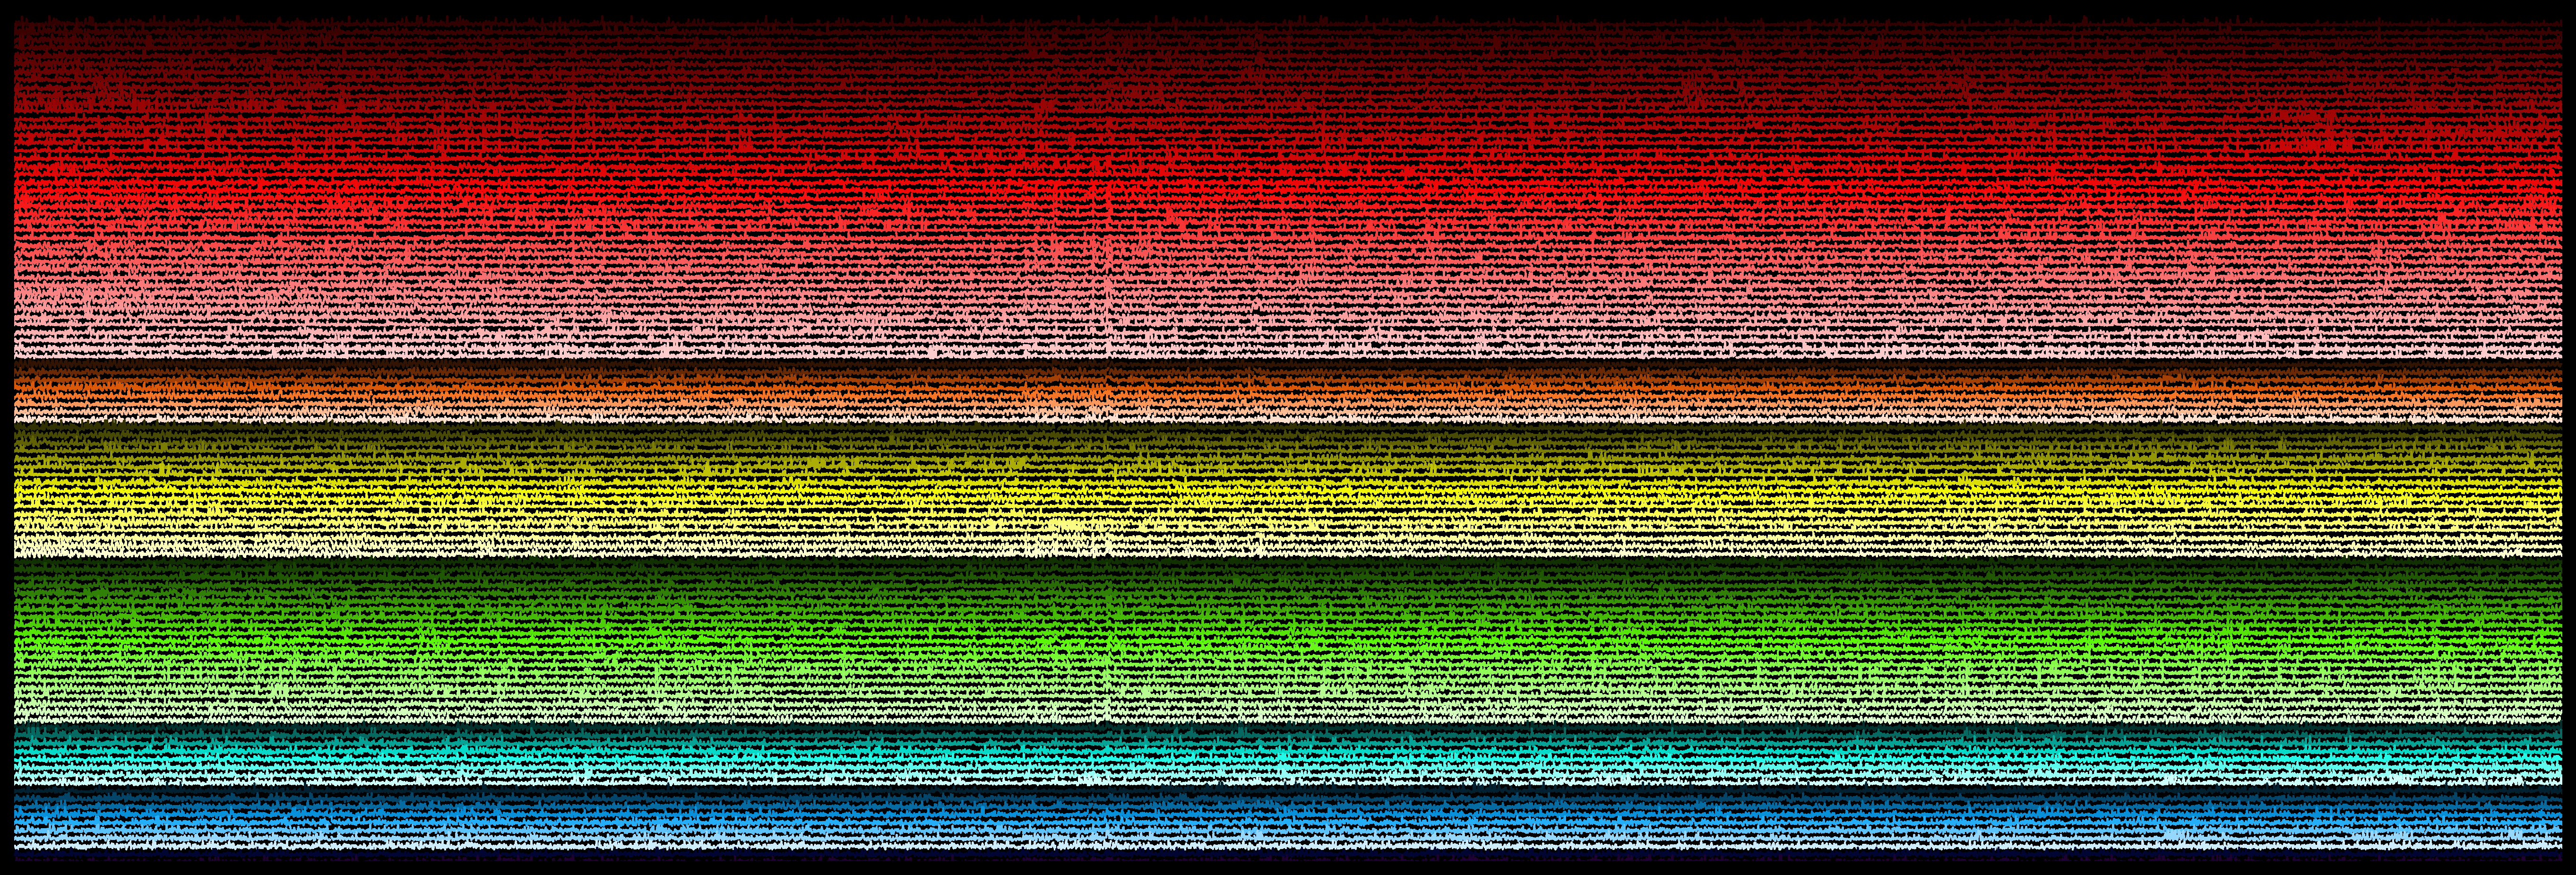

In [112]:
plt.style.use('dark_background')
spy.plot.main.plot_synaptic_traces(datp, fs=200, colors=colors_fin, figsize=(18, 6))